# Melbourne Housing Market Analysis

## Overview 
#### The objective of this prokect is to analyse the data avaiable in Melbourne housing market from Jan 2016 to Sep 2017. This dataset includes the properties's address, type, landsize, room number and other information. 

#### There are three parts of this project, within each part, few questions will be answered.
### Part I: Data overview
#### Q1.  How many properties were on list during this period? how it distributes in different surburb?
#### Q2. In which surburb, the average price/median price of properties is most expensive. 
#### Q3. How the price distributes in different region?
#### Q4. What is the sales amount within this period for each surburb. 
#### Q5. Who are the top 5 agencies( how many properties have sold).
#### Q6. What is percentage of different property types in Melbourne?

### Part II: Factors that affect the property selling
#### Q7.  Is the distance to city will affect the property price?
#### Q8. Is there any busy season for the house selling?
#### Q9. Would the method of selling will affect the price?
#### Q10. Within a same suburb, is property type, land size, the amount of bedroom and bathroom, car park number will affect the price?

### Part III: Prediction
#### Q11. Predict the land price for each council
#### Q12. Predict the average property price by considering the interest rate policy

### 1. import library and dataset


In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_csv('melb_data.csv')
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Aberfeldie,10 Caroline St,5,h,1830000,S,Rendina,23/9/2017,7.5,3040,...,4,4.0,730,373.0,2014.0,NaN,-37.75950,144.89427,Western Metropolitan,1543
1,Airport West,33 Bedford St,3,h,860000,S,Harcourts,23/9/2017,10.4,3042,...,2,2.0,593,NaN,NaN,NaN,-37.72057,144.87558,Western Metropolitan,3464
2,Airport West,16 Highridge Cr,3,h,850000,S,Brad,23/9/2017,10.4,3042,...,1,2.0,551,96.0,1950.0,NaN,-37.72739,144.88235,Western Metropolitan,3464
3,Albanvale,5 Hedgerow Ct,3,h,565000,S,Bells,23/9/2017,14.0,3021,...,1,2.0,619,NaN,NaN,NaN,-37.74521,144.76863,Western Metropolitan,1899
4,Albert Park,59 Moubray St,3,h,2100000,VB,Cayzer,23/9/2017,3.0,3206,...,2,NaN,137,125.0,1890.0,NaN,-37.84388,144.95303,Southern Metropolitan,3280


In [3]:
house.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [4]:
house.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### 2. Data Analysis

### Q1:How many properties were on list during this period? 

In [5]:
house["Address"].nunique()

13378

#### There are 13378 properties listed on this period.

### how it distributes in different regions?

In [6]:
Region_number=house.groupby(by="Regionname",as_index=False).agg({"Address":pd.Series.nunique}).sort_values(by="Address",ascending=False)
Region_number

,Regionname,Address
5,Southern Metropolitan,4660
2,Northern Metropolitan,3838
6,Western Metropolitan,2907
0,Eastern Metropolitan,1466
4,South-Eastern Metropolitan,448
1,Eastern Victoria,53
3,Northern Victoria,41
7,Western Victoria,32


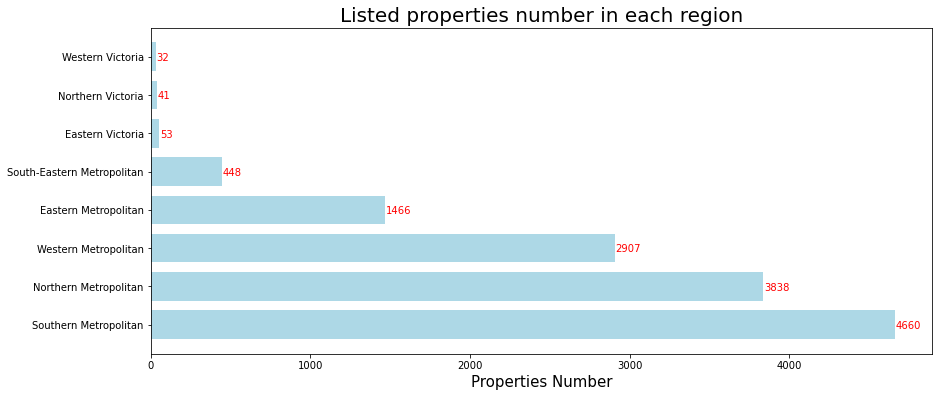

In [7]:
x=Region_number["Regionname"]
y=Region_number["Address"]
fig, ax =plt.subplots(figsize=(14,6))
width=0.75
ax.barh(x,y,width,color="lightblue")
ax.set_title("Listed properties number in each region",fontsize=20)
ax.set_xlabel("Properties Number",fontsize=15)
for i, v in enumerate(Region_number["Address"]):
    ax.text(v + 4, i-0.1 , str(v),
            color = 'red', fontsize=10)
plt.show()

#### Southern Metropolitan has the largest number of listed properties and western victoria has the smallest number.

### top 5 surbubs that sell most properties? Which area does the surburb in?

In [166]:
top5_surbubs=house.groupby(["Suburb","Regionname"])["Address"].count().sort_values(ascending=False).head(5).reset_index(name="Property_number")
top5_surbubs

,Suburb,Regionname,Property_number
0,Reservoir,Northern Metropolitan,359
1,Richmond,Northern Metropolitan,260
2,Bentleigh East,Southern Metropolitan,249
3,Preston,Northern Metropolitan,239
4,Brunswick,Northern Metropolitan,222


#### We could see the top 5 suburbs are Reservoir, Richmond, Bentleigh East, Preston and Brunswick.

### Q2. In which surburb, the average price/median price of properties is most expensive. 

In [179]:
Region_price=house.groupby(by="Regionname",as_index=False)["Price"].mean().sort_values(by="Price",ascending=False)

Region_price

,Regionname,Price
5,Southern Metropolitan,1.372963e+06
0,Eastern Metropolitan,1.104080e+06
4,South-Eastern Metropolitan,9.229438e+05
2,Northern Metropolitan,8.981711e+05
6,Western Metropolitan,8.664205e+05
1,Eastern Victoria,6.999808e+05
3,Northern Victoria,5.948293e+05
7,Western Victoria,3.975234e+05


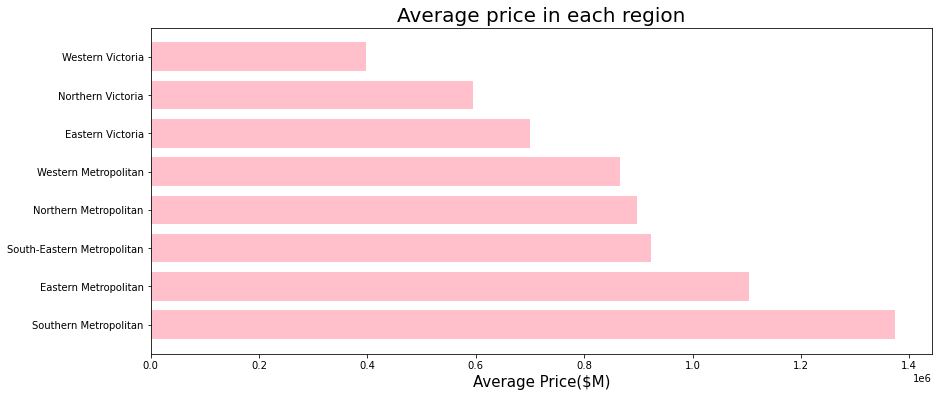

In [185]:
x=Region_price["Regionname"]
y=Region_price["Price"]
fig, ax =plt.subplots(figsize=(14,6))
width=0.75
ax.barh(x,y,width,color="pink")
ax.set_title("Average price in each region",fontsize=20)
ax.set_xlabel("Average Price($M)",fontsize=15)

plt.show()

### Check the distance of each Region

In [206]:
region_distance=house.groupby("Regionname").agg(Min_Distance=("Distance",np.min),Max_Distance=("Distance",np.max),Mean_Distance=("Distance",np.mean))

In [209]:
region_distance_price=pd.merge(Region_price,region_distance,on=["Regionname","Regionname"]).sort_values(by="Price",ascending=True)

In [210]:
region_distance_price

,Regionname,Price,Min_Distance,Max_Distance,Mean_Distance
7,Western Victoria,3.975234e+05,29.8,37.5,30.753125
6,Northern Victoria,5.948293e+05,21.8,48.1,33.748780
5,Eastern Victoria,6.999808e+05,25.2,47.3,34.209434
4,Western Metropolitan,8.664205e+05,4.3,31.7,10.104579
3,Northern Metropolitan,8.981711e+05,0.0,25.9,8.078329
2,South-Eastern Metropolitan,9.229438e+05,14.7,38.0,23.813556
1,Eastern Metropolitan,1.104080e+06,7.8,27.0,13.901088
0,Southern Metropolitan,1.372963e+06,0.7,17.9,8.756656


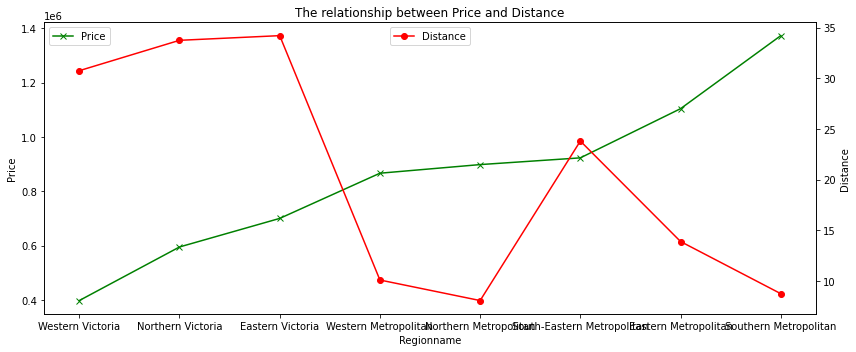

In [211]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('The relationship between Price and Distance')
ax.set_xlabel('Regionname')
ax.plot(region_distance_price['Regionname'], region_distance_price['Price'], color='green', marker='x')
ax2.plot(region_distance_price['Regionname'], region_distance_price['Mean_Distance'], color='red', marker='o')
ax.set_ylabel('Price')
ax2.set_ylabel('Distance')
ax.legend(['Price'])
ax2.legend(['Distance'], loc='upper center')
ax.set_xticks(region_distance_price['Regionname'])
plt.tight_layout()
plt.show()

### There is no particular pattern between distance and price from the perspective of Region.
### We could analyse from other aspects.

<AxesSubplot:xlabel='Distance', ylabel='Price'>

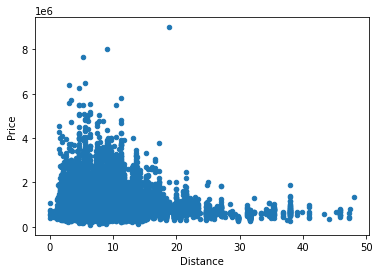

In [212]:
house.plot.scatter(x="Distance",y="Price") 

In [213]:
### It is hard to identify the relationship. 

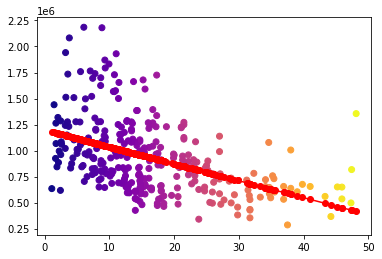

In [214]:
surburb_distance=house.groupby("Suburb")["Distance"].mean().sort_values(ascending=False).reset_index(name="Distance")
surburb_price=house.groupby("Suburb")["Price"].mean().sort_values(ascending=False).reset_index(name="Price")
result=pd.merge(surburb_distance,surburb_price,on=["Suburb","Suburb"])
x=result["Distance"]
y=result["Price"]
fig, ax = plt.subplots()
_ = ax.scatter(x, y, c=x, cmap='plasma')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r-o")

plt.show()

In [215]:
### From suburb, we could clearly see the relationship between the distance and price. 

### Q3. How the price distributes in different regions?

Text(0, 0.5, 'Number')

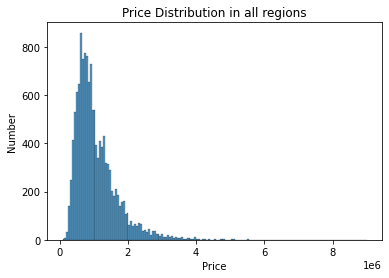

In [14]:
sns.histplot(data=house,x="Price").set(title="Price Distribution in all regions")
plt.ylabel("Number")

#### We could see the price of properties is mainly less then 1million.

In [15]:
house["Regionname"].unique()

array(['Western Metropolitan', 'Southern Metropolitan',
       'Eastern Metropolitan', 'Eastern Victoria',
       'South-Eastern Metropolitan', 'Northern Metropolitan',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [16]:
western_metropolitan=house["Price"].loc[house["Regionname"]=="Western Metropolitan"].values
southern_metropolitan=house["Price"].loc[house["Regionname"]=="Southern Metropolitan"].values
eastern_metropolitan=house["Price"].loc[house["Regionname"]=="Eastern Metropolitan"].values
eastern_victoria=house["Price"].loc[house["Regionname"]=="Eastern Victoria"].values
south_eastern_metropolitan=house["Price"].loc[house["Regionname"]=="South-Eastern Metropolitan"].values
northern_metropolitan=house["Price"].loc[house["Regionname"]=="Northern Metropolitan"].values
northern_victoria=house["Price"].loc[house["Regionname"]=="Northern Victoria"].values
western_victoria=house["Price"].loc[house["Regionname"]=="Western Victoria"].values

Text(0, 0.5, 'Number')

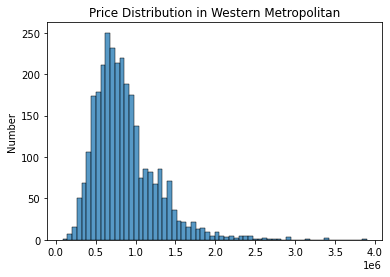

In [17]:
sns.histplot(data=western_metropolitan).set(title="Price Distribution in Western Metropolitan")
plt.ylabel("Number")

[Text(0.5, 1.0, 'Southern Metropolitan')]

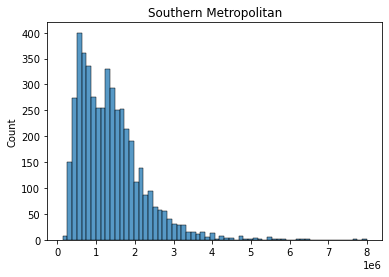

In [18]:
sns.histplot(data=southern_metropolitan).set(title="Southern Metropolitan")

### Q4. What is the sales amount within this period for each surburb.

In [12]:
house.groupby("Suburb")["Price"].mean().sort_values(ascending=False).head(10)

Suburb
Kooyong         2.185000e+06
Canterbury      2.180241e+06
Middle Park     2.082529e+06
Albert Park     1.941355e+06
Brighton        1.930158e+06
Balwyn          1.869879e+06
Eaglemont       1.831696e+06
Balwyn North    1.793405e+06
Malvern         1.764993e+06
Kew             1.758435e+06
Name: Price, dtype: float64

In [11]:
house.groupby("Suburb")["Price"].mean().sort_values(ascending=False).tail(10)

Suburb
Truganina        462870.000000
Brookfield       456000.000000
Melton West      433875.000000
Melton           427208.333333
Dallas           425000.000000
Melton South     380736.111111
Wallan           366000.000000
Kurunjang        353000.000000
Rockbank         340000.000000
Bacchus Marsh    285000.000000
Name: Price, dtype: float64

### Q5. Who are the top 5 agencies( how many properties have sold). 
### Q5.1 According to the properties amount
### Q5.2 Acoording to the area

In [83]:
house.groupby("SellerG")["SellerG"].count().sort_values(ascending=False).head(5)

SellerG
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
Name: SellerG, dtype: int64

In [84]:
top5=house.loc[house.SellerG.isin(["Nelson","Jellis","hockingstuart","Barry","Ray"])].groupby(by=["SellerG","Type"])["Type"].count().reset_index(name="count")
top5

,SellerG,Type,count
0,Barry,h,820
1,Barry,t,74
2,Barry,u,117
3,Jellis,h,875
4,Jellis,t,129
5,Jellis,u,312
6,Nelson,h,1160
7,Nelson,t,134
8,Nelson,u,271
9,Ray,h,528


[Text(0.5, 1.0, 'Listed Properties Numbers of Top 5 Agnecy')]

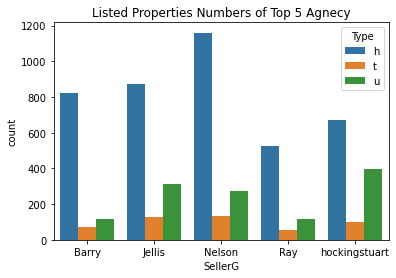

In [85]:
sns.barplot(data=top5,x="SellerG",y="count",hue="Type").set(title="Listed Properties Numbers of Top 5 Agnecy")

#### The top 5 seller is Nelson, Jellis, hockingstuart ,Barry and Ray. Most of the properties they sold is house.
### Then we could research which area is the main market of these five sellers.

In [222]:
house.loc[house.SellerG.isin(["Nelson","Jellis","hockingstuart","Barry","Ray"])].groupby(["SellerG","Regionname"])["SellerG"].count()

SellerG        Regionname                
Barry          Eastern Metropolitan          293
               Eastern Victoria                3
               Northern Metropolitan         323
               Northern Victoria               2
               South-Eastern Metropolitan     28
               Southern Metropolitan          25
               Western Metropolitan          337
Jellis         Eastern Metropolitan          139
               Northern Metropolitan         474
               South-Eastern Metropolitan      3
               Southern Metropolitan         640
               Western Metropolitan           60
Nelson         Eastern Metropolitan           90
               Northern Metropolitan         938
               South-Eastern Metropolitan      2
               Southern Metropolitan          55
               Western Metropolitan          480
Ray            Eastern Metropolitan          157
               Eastern Victoria                6
               Northern Met

In [223]:
###? draw a distribution map?

### Q6. What is percentage of different property types in Melbourne?

In [22]:
type_number=house.groupby("Type")["Type"].count()
type_number

Type
h    9449
t    1114
u    3017
Name: Type, dtype: int64

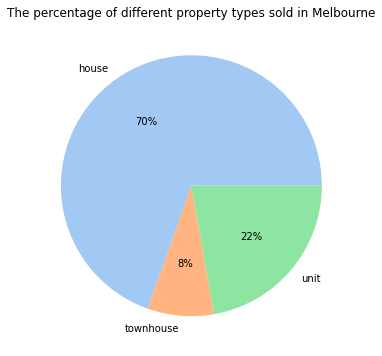

In [23]:
labels=["house","townhouse","unit"]
colors=sns.color_palette("pastel")[0:3]
pie,ax=plt.subplots(figsize=(10,6))
plt.pie(type_number,labels=labels,colors=colors,autopct="%.0f%%")
plt.title("The percentage of different property types sold in Melbourne")
plt.show()

### Q8. Is there any busy season for the house selling?

In [57]:
#extract month from dataframe
house["month"]=pd.DatetimeIndex(house['Date']).month

/Users/huhuhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '27/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/huhuhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '19/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/huhuhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(


In [67]:
house_sales=house.groupby("month")["Price"].sum().reset_index(name="Sale_amount")
house_sales=house_sales.sort_values(by="month")

In [69]:
house_sales

,month,Sale_amount
0,1,261262200
1,2,389294088
2,3,1614641017
3,4,1308896688
4,5,1804795039
5,6,1570333714
6,7,1709247034
7,8,1954287081
8,9,1338102426
9,10,970118298


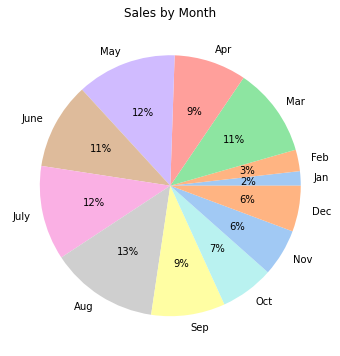

In [72]:
labels=["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"]
colors=sns.color_palette("pastel")
pie,ax=plt.subplots(figsize=(10,6))
plt.pie(house_sales["Sale_amount"],labels=labels,colors=colors,autopct="%.0f%%")
plt.title("Sales by Month")
plt.show()

In [ ]:
#compare the sales by year (line chart)


### Q9. Would the method of selling will affect the price?

In [82]:
house.Method.unique()

array(['S', 'VB', 'SP', 'PI', 'SA'], dtype=object)

In [143]:
house.groupby("Method")["Price"].mean()

Method
PI    1.133242e+06
S     1.087327e+06
SA    1.025772e+06
SP    8.998924e+05
VB    1.166510e+06
Name: Price, dtype: float64

In [ ]:
###draw a bar cahrt?

### Q10.  is property type, land size, the amount of bedroom and bathroom, car park number will affect the price?

In [167]:
house.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,month
0,Aberfeldie,10 Caroline St,5,h,1830000,S,Rendina,23/9/2017,7.5,3040,...,4.0,730,373.0,2014.0,NaN,-37.75950,144.89427,Western Metropolitan,1543,9
1,Airport West,33 Bedford St,3,h,860000,S,Harcourts,23/9/2017,10.4,3042,...,2.0,593,NaN,NaN,NaN,-37.72057,144.87558,Western Metropolitan,3464,9
2,Airport West,16 Highridge Cr,3,h,850000,S,Brad,23/9/2017,10.4,3042,...,2.0,551,96.0,1950.0,NaN,-37.72739,144.88235,Western Metropolitan,3464,9
3,Albanvale,5 Hedgerow Ct,3,h,565000,S,Bells,23/9/2017,14.0,3021,...,2.0,619,NaN,NaN,NaN,-37.74521,144.76863,Western Metropolitan,1899,9
4,Albert Park,59 Moubray St,3,h,2100000,VB,Cayzer,23/9/2017,3.0,3206,...,NaN,137,125.0,1890.0,NaN,-37.84388,144.95303,Southern Metropolitan,3280,9


In [171]:
df=house[["Rooms","Price","Distance","Car","Landsize","Bedroom2","Bathroom"]]
df

,Rooms,Price,Distance,Car,Landsize,Bedroom2,Bathroom
0,5,1830000,7.5,4.0,730,5,4
1,3,860000,10.4,2.0,593,3,2
2,3,850000,10.4,2.0,551,3,1
3,3,565000,14.0,2.0,619,3,1
4,3,2100000,3.0,NaN,137,3,2
...,...,...,...,...,...,...,...
13575,1,250000,11.8,1.0,0,1,1
13576,3,1415000,8.2,6.0,970,3,1
13577,2,765000,13.9,2.0,672,2,1
13578,2,813000,11.2,2.0,108,2,1


<AxesSubplot:>

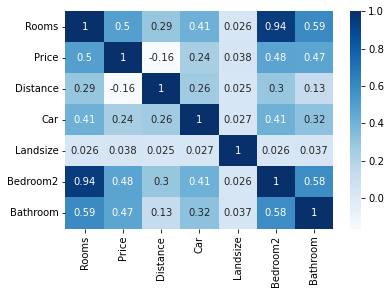

In [175]:
corr=df.corr()
sns.heatmap(corr,cmap="Blues",annot=True)